In [100]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [101]:
df1 = pd.read_csv('C:/Users/USER/Downloads/housing.csv')

In [102]:
df2 = pd.read_csv('C:/Users/USER/Downloads/concreteData.csv')

In [103]:
df3 = pd.read_csv('C:/Users/USER/Downloads/yachtData.csv')

In [104]:
df2.describe()

,540,0,0.1,162,2.5,1040,676,28,79.99
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,280.916327,73.967638,54.241011,181.586297,6.208260,972.853741,773.675316,45.679300,35.775034
std,104.244768,86.290493,64.005792,21.355876,5.975628,77.763596,80.157154,63.198226,16.656933
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,732.600000,7.000000,23.700000
50%,272.800000,22.000000,0.000000,185.000000,6.400000,968.000000,779.700000,28.000000,34.400000
75%,350.000000,143.000000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,45.940000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [105]:
df2.corr()

,540,0,0.1,162,2.5,1040,676,28,79.99
540,1.000000,-0.274069,-0.396751,-0.079650,0.094179,-0.111802,-0.220603,0.082870,0.494619
0,-0.274069,1.000000,-0.324514,0.106570,0.042777,-0.283484,-0.282921,-0.044497,0.137550
0.1,-0.396751,-0.324514,1.000000,-0.257934,0.377194,-0.009257,0.078190,-0.154661,-0.103967
162,-0.079650,0.106570,-0.257934,1.000000,-0.658478,-0.181665,-0.452257,0.277493,-0.288376
2.5,0.094179,0.042777,0.377194,-0.658478,1.000000,-0.265625,0.222159,-0.192912,0.369000
1040,-0.111802,-0.283484,-0.009257,-0.181665,-0.265625,1.000000,-0.177652,-0.002782,-0.167786
676,-0.220603,-0.282921,0.078190,-0.452257,0.222159,-0.177652,1.000000,-0.156544,-0.164790
28,0.082870,-0.044497,-0.154661,0.277493,-0.192912,-0.002782,-0.156544,1.000000,0.330731
79.99,0.494619,0.137550,-0.103967,-0.288376,0.369000,-0.167786,-0.164790,0.330731,1.000000


In [204]:
class LinearRegression:
    def __init__(self, X, y, learningRate, tolerance, lamda, sample_size, maxIteration, gd=False, sgd=False) -> None:
        self.X = X
        self.y = y
        
        self.tolerance = tolerance
        self.lamda = lamda
        self.sample_size = sample_size
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.gd = gd
        self.sgd = sgd
        
    def splitTrainTest(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.4, random_state = 1)
        return X_train, X_test, y_train, y_test
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def normalize(self, X):
        mean = np.mean(X, 0)
        std = np.std(X, 0)
        X_norm = (X - mean)/std
        X_norm = self.add_X0(X_norm)
        
        return X_norm, mean, std
    
    def normalizetestdata(self, X, meanTrain, stdTrain):
        X_norm = (X - meanTrain) / stdTrain
        X_norm = self.add_X0(X_norm)
        
        return X_norm
    
    def checkMatrix(self, X):
        X_rank = np.linalg.matrix_rank(X)
        
        if X_rank == min(X.shape[0], X.shape[1]):
            self.fullRank = True
            print('data is full rank')
        else:
            self.fullRank = False
            print('data is not full rank')
            
    def checkInvertibility(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
        else:
            self.lowRank = False
            
    def closedFormSolution(self, X, y):
        A = X.T.dot(X)
        I = np.eye(A.shape[0])
        w = np.linalg.inv(X.T.dot(X)+self.lamda*I).dot(X.T).dot(y)
        
        return w
    
    def gradientDescent(self, X, y):
        
        self.errors = []
        
        lastError = float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            
            self.w = self.w - self.learningRate*self.costDerivation(X, y)
            
  
            cur = self.rmse(X,y)
            diff = lastError - cur
            lastError = cur
            
            self.errors.append(cur)
            if diff < self.tolerance:
                print("The model stopped - no further improvement")
                break
            
    def s_gradientDescent(self, X, y):
        
        self.errors = []
        
        lastError = float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            index = np.random.choice(X.shape[0], self.sample_size, replace = False) 
            X = X[index]
            y = y[index]
            self.w = self.w - self.learningRate*self.costDerivation(X, y)    
            cur = self.rmse(X,y)           
            
            diff = lastError - cur
            lastError = cur
            
            self.errors.append(cur)
            if diff < self.tolerance:
                print("The model stopped - no further improvement")
                break
        
    def predict(self, X):
        return X.dot(self.w)
    
    def sse(self,X,y):
        
        y_hat=self.predict(X)
        return ((y_hat-y)**2).sum()
    
    def rmse(self,X,y):

        return np.sqrt(self.sse(X,y)/X.shape[0])
    
    def costFunction(self, X, y):
        return self.sse(X,y)/2
    
    def costDerivation(self, X, y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X)+self.lamda*self.w
    
    def fit(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.splitTrainTest()
        
        #normalize the data
        self.X_train, meanTrain, stdTrain = self.normalize(self.X_train)
        self.X_test = self.normalizetestdata(self.X_test, meanTrain, stdTrain)
        
        self.checkInvertibility(self.X_train)
        self.checkMatrix(self.X_train)
        
        if self.fullRank and not self.lowRank and not self.gd and not self.sgd:
            #print("Solving using Normal equation - closed form solution")
            self.w = self.closedFormSolution(self.X_train, self.y_train)
            
          
            
        elif self.fullRank and not self.lowRank and not self.gd and self.sgd:
            print("Solving using self gradient descent")
            
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.s_gradientDescent(self.X_train, self.y_train)
            
        
        else:
            print("solving using gradient descent")
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.gradientDescent(self.X_train, self.y_train)
            
        print(self.w)
        sse_training=self.sse(self.X_train,self.y_train)
        rmse_training=self.rmse(self.X_train,self.y_train)
        print('The SSE on training data is {} and RMSE is {}'.format(sse_training,rmse_training))
        sse_testing=self.sse(self.X_test,self.y_test)
        rmse_testing=self.rmse(self.X_test,self.y_test)
        print('The SSE on testing data is {} and RMSE is {}'.format(sse_testing,rmse_testing))
 

In [205]:
# Closed Form Solution
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.006, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = False)
regression.fit()

data is full rank
[10.38581522  0.85359091  0.53091261  3.14435008 -2.77791418 -3.07815146
 12.69097692]
The SSE on training data is 15199.535454333862 and RMSE is 9.08879370144722
The SSE on testing data is 9088.93266222409 and RMSE is 8.59614806070118


In [206]:
# Closed Form Solution with regularization
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = False)
regression.fit()

data is full rank
[ 9.85046392  0.74776646 -0.15166479  0.37196966 -0.38672134 -0.35516822
 12.00477918]
The SSE on training data is 15363.633492396026 and RMSE is 9.137724449273351
The SSE on testing data is 8861.247535889774 and RMSE is 8.48779493705007


In [207]:
# Gradient Descent
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.004, maxIteration = 50000, lamda = 0, sample_size = 100, gd = True, sgd = False)
regression.fit()

data is full rank
solving using gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[10.03145473  0.69187079 -0.22638618  0.0385856  -0.12280504 -0.01475451
 12.20446141]
The SSE on training data is 15302.71005389322 and RMSE is 9.11958894176766
The SSE on testing data is 8867.91785762461 and RMSE is 8.490988938363987


<function matplotlib.pyplot.show(*args, **kw)>

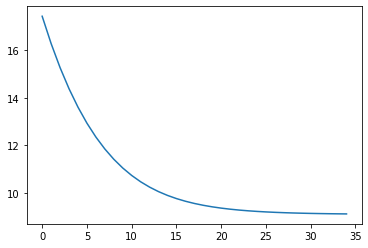

In [208]:
a = regression.errors
plt.plot(a)
plt.show


In [209]:
# Gradient Descent with regularization
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.004, maxIteration = 50000, lamda = 1, sample_size = 100, gd = True, sgd = False)
regression.fit()

data is full rank
solving using gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[10.01593885  0.6957557  -0.22614235  0.04053873 -0.12231988 -0.01773369
 12.18658014]
The SSE on training data is 15307.540190221058 and RMSE is 9.12102807844177
The SSE on testing data is 8866.115441906264 and RMSE is 8.490125992297852


<function matplotlib.pyplot.show(*args, **kw)>

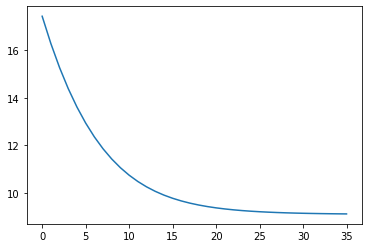

In [210]:
a = regression.errors
plt.plot(a)
plt.show

In [211]:
# Stochastic Gradient Descent 
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.003, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[ 8.91319855  0.43577263 -1.13802101  0.16457788 -0.2961865  -0.29451927
 10.75339569]
The SSE on training data is 16477.04170626903 and RMSE is 9.463040722092654
The SSE on testing data is 9093.790565701613 and RMSE is 8.5984450124264


<function matplotlib.pyplot.show(*args, **kw)>

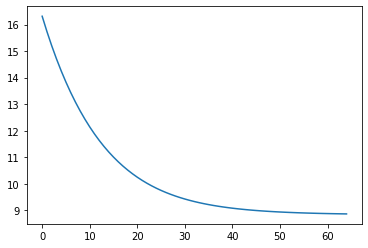

In [212]:
a = regression.errors
plt.plot(a)
plt.show

In [213]:
# Stochastic Gradient Descent with regularization
regression = LinearRegression(df.values[:, 0:-1], df.values[:, -1], learningRate = 0.0005, tolerance = 0.003, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[ 9.95261556  1.14242987 -0.24227879 -0.36672735  0.20961264 -0.3756851
 12.23591842]
The SSE on training data is 15422.949869453012 and RMSE is 9.155347056517744
The SSE on testing data is 9060.039084905768 and RMSE is 8.58247367306346


<function matplotlib.pyplot.show(*args, **kw)>

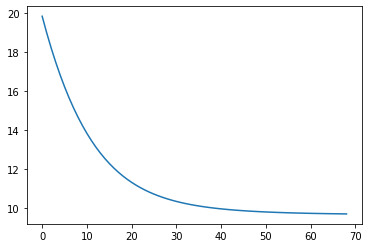

In [214]:
a = regression.errors
plt.plot(a)
plt.show

In [218]:
#ConcreteData
# Closed Form Solution
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.005, tolerance = 0.005, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = False)
regression.fit()

data is full rank
[35.91316045 11.94436145  8.48359058  5.02660879 -3.61384805  1.90486111
  1.20374431  1.06788019  7.24824992]
The SSE on training data is 65484.849497418865 and RMSE is 10.302149191002684
The SSE on testing data is 44648.571154598794 and RMSE is 10.410106547793102


In [219]:
#ConcreteData
# Closed Form Solution
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.005, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = False)
regression.fit()

data is full rank
[35.34038278 10.11270375  6.66226242  3.41342443 -4.69021939  2.00114988
 -0.04020913 -0.44929383  7.00945922]
The SSE on training data is 66005.91805396418 and RMSE is 10.343055520215936
The SSE on testing data is 44733.685916722236 and RMSE is 10.420024355291105


In [132]:
#ConcreteData
# Gradient Descent
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.0001, tolerance = 0.005, maxIteration = 50000, lamda = 0, sample_size = 100, gd = True, sgd = False)
regression.fit()

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  1%|█                                                                            | 665/50000 [00:01<01:51, 441.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  1%|█                                                                            | 713/50000 [00:01<01:49, 451.24it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▏                                                                           | 764/50000 [00:01<01:45, 465.19it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▎                                                                           | 813/50000 [00:01<01:44, 470.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▎                                                                           | 861/50000 [00:01<01:44, 471.95it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▍                                                                           | 909/50000 [00:01<01:45, 465.07it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▍                                                                           | 956/50000 [00:01<01:48, 450.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▌                                                                          | 1002/50000 [00:01<01:50, 443.43it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▌                                                                          | 1047/50000 [00:02<01:56, 421.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▋                                                                          | 1090/50000 [00:02<01:59, 407.81it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▋                                                                          | 1132/50000 [00:02<02:02, 399.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▊                                                                          | 1173/50000 [00:02<02:06, 385.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  2%|█▊                                                                          | 1217/50000 [00:02<02:02, 399.30it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|█▉                                                                          | 1262/50000 [00:02<01:58, 412.44it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|█▉                                                                          | 1304/50000 [00:02<01:57, 413.78it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██                                                                          | 1347/50000 [00:02<01:56, 417.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██                                                                          | 1396/50000 [00:02<01:51, 436.14it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▏                                                                         | 1446/50000 [00:03<01:47, 452.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▎                                                                         | 1496/50000 [00:03<01:44, 463.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▎                                                                         | 1544/50000 [00:03<01:43, 466.06it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▍                                                                         | 1591/50000 [00:03<01:47, 448.90it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▍                                                                         | 1637/50000 [00:03<01:53, 425.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▌                                                                         | 1680/50000 [00:03<02:05, 384.57it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  3%|██▋                                                                         | 1729/50000 [00:03<01:57, 409.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|██▋                                                                         | 1775/50000 [00:03<01:54, 422.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|██▊                                                                         | 1819/50000 [00:03<01:56, 412.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|██▊                                                                         | 1864/50000 [00:04<01:54, 420.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|██▉                                                                         | 1914/50000 [00:04<01:49, 439.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|██▉                                                                         | 1962/50000 [00:04<01:46, 448.98it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|███                                                                         | 2011/50000 [00:04<01:44, 458.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|███▏                                                                        | 2061/50000 [00:04<01:42, 467.79it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|███▏                                                                        | 2109/50000 [00:04<01:44, 456.98it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|███▎                                                                        | 2155/50000 [00:04<01:45, 455.53it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  4%|███▎                                                                        | 2204/50000 [00:04<01:42, 464.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▍                                                                        | 2251/50000 [00:04<01:53, 421.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▍                                                                        | 2300/50000 [00:05<01:48, 437.82it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▌                                                                        | 2348/50000 [00:05<01:46, 448.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▋                                                                        | 2394/50000 [00:05<01:55, 413.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▋                                                                        | 2440/50000 [00:05<01:51, 425.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▊                                                                        | 2493/50000 [00:05<01:45, 451.45it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▊                                                                        | 2540/50000 [00:05<01:46, 444.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|███▉                                                                        | 2588/50000 [00:05<01:44, 453.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|████                                                                        | 2650/50000 [00:05<01:36, 492.37it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  5%|████                                                                        | 2711/50000 [00:05<01:30, 520.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  6%|████▏                                                                       | 2765/50000 [00:05<01:33, 507.23it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

  6%|████▎                                                                       | 2819/50000 [00:06<01:31, 515.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████                                                                    | 5285/50000 [00:11<01:39, 450.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▏                                                                   | 5347/50000 [00:11<01:31, 489.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▏                                                                   | 5411/50000 [00:11<01:25, 524.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▎                                                                   | 5466/50000 [00:11<01:26, 514.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▍                                                                   | 5519/50000 [00:11<01:26, 513.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▍                                                                   | 5572/50000 [00:12<01:26, 515.67it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▌                                                                   | 5627/50000 [00:12<01:24, 524.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 11%|████████▋                                                                   | 5690/50000 [00:12<01:20, 551.11it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|████████▋                                                                   | 5752/50000 [00:12<01:17, 568.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|████████▊                                                                   | 5814/50000 [00:12<01:15, 582.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|████████▉                                                                   | 5879/50000 [00:12<01:13, 598.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████                                                                   | 5940/50000 [00:12<01:16, 574.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████                                                                   | 5999/50000 [00:12<01:19, 552.23it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████▏                                                                  | 6055/50000 [00:12<01:33, 467.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████▎                                                                  | 6105/50000 [00:13<01:39, 440.75it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████▎                                                                  | 6152/50000 [00:13<01:38, 444.39it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████▍                                                                  | 6198/50000 [00:13<01:41, 431.65it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 12%|█████████▍                                                                  | 6247/50000 [00:13<01:37, 446.75it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▌                                                                  | 6293/50000 [00:13<01:37, 449.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▋                                                                  | 6339/50000 [00:13<01:37, 447.80it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▋                                                                  | 6385/50000 [00:13<01:40, 435.13it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▊                                                                  | 6429/50000 [00:13<01:43, 419.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▊                                                                  | 6478/50000 [00:13<01:39, 435.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▉                                                                  | 6527/50000 [00:14<01:36, 448.19it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|█████████▉                                                                  | 6576/50000 [00:14<01:34, 459.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|██████████                                                                  | 6623/50000 [00:14<01:34, 461.27it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|██████████▏                                                                 | 6670/50000 [00:14<01:38, 438.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 13%|██████████▏                                                                 | 6715/50000 [00:14<01:43, 416.40it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▎                                                                 | 6758/50000 [00:14<01:46, 404.15it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▎                                                                 | 6801/50000 [00:14<01:45, 408.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▍                                                                 | 6850/50000 [00:14<01:40, 429.04it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▍                                                                 | 6899/50000 [00:14<01:36, 444.78it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▌                                                                 | 6947/50000 [00:14<01:34, 453.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▋                                                                 | 6993/50000 [00:15<01:36, 446.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▋                                                                 | 7038/50000 [00:15<01:43, 413.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▊                                                                 | 7081/50000 [00:15<01:43, 415.07it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▊                                                                 | 7125/50000 [00:15<01:41, 421.37it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▉                                                                 | 7168/50000 [00:15<01:42, 416.87it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 14%|██████████▉                                                                 | 7217/50000 [00:15<01:38, 435.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████                                                                 | 7265/50000 [00:15<01:35, 447.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████                                                                 | 7314/50000 [00:15<01:33, 458.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▏                                                                | 7372/50000 [00:15<01:27, 486.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▎                                                                | 7434/50000 [00:16<01:21, 519.45it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▍                                                                | 7497/50000 [00:16<01:17, 545.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▍                                                                | 7553/50000 [00:16<01:20, 527.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▌                                                                | 7607/50000 [00:16<01:22, 514.72it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▋                                                                | 7660/50000 [00:16<01:26, 488.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 15%|███████████▋                                                                | 7721/50000 [00:16<01:21, 518.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████▏                                                            | 9955/50000 [00:21<01:34, 422.43it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████                                                            | 10001/50000 [00:21<01:32, 432.15it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████                                                            | 10049/50000 [00:21<01:29, 444.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████▏                                                           | 10094/50000 [00:21<01:30, 441.30it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████▏                                                           | 10139/50000 [00:21<01:32, 432.72it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████▎                                                           | 10183/50000 [00:21<01:32, 430.13it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 20%|███████████████▎                                                           | 10245/50000 [00:22<01:24, 472.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▍                                                           | 10298/50000 [00:22<01:21, 486.34it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▌                                                           | 10348/50000 [00:22<01:21, 486.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▌                                                           | 10404/50000 [00:22<01:18, 505.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▋                                                           | 10465/50000 [00:22<01:14, 531.80it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▊                                                           | 10523/50000 [00:22<01:12, 542.87it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▊                                                           | 10578/50000 [00:22<01:13, 539.03it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|███████████████▉                                                           | 10633/50000 [00:22<01:16, 516.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 21%|████████████████                                                           | 10696/50000 [00:22<01:12, 543.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▏                                                          | 10758/50000 [00:23<01:09, 561.95it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▏                                                          | 10815/50000 [00:23<01:10, 558.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▎                                                          | 10872/50000 [00:23<01:11, 546.00it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▍                                                          | 10927/50000 [00:23<01:19, 493.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▍                                                          | 10978/50000 [00:23<01:18, 495.65it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▌                                                          | 11029/50000 [00:23<01:19, 487.39it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▌                                                          | 11079/50000 [00:23<01:22, 470.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▋                                                          | 11127/50000 [00:23<01:24, 460.25it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▊                                                          | 11174/50000 [00:23<01:25, 451.51it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 22%|████████████████▊                                                          | 11220/50000 [00:24<01:28, 436.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|████████████████▉                                                          | 11264/50000 [00:24<01:31, 423.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|████████████████▉                                                          | 11309/50000 [00:24<01:30, 428.04it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████                                                          | 11353/50000 [00:24<01:30, 429.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████                                                          | 11402/50000 [00:24<01:26, 445.04it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▏                                                         | 11452/50000 [00:24<01:23, 459.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▏                                                         | 11499/50000 [00:24<01:24, 453.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▎                                                         | 11545/50000 [00:24<01:28, 436.36it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▍                                                         | 11589/50000 [00:24<01:31, 420.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▍                                                         | 11645/50000 [00:24<01:24, 453.48it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 23%|█████████████████▌                                                         | 11709/50000 [00:25<01:17, 494.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|█████████████████▋                                                         | 11764/50000 [00:25<01:15, 509.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|█████████████████▋                                                         | 11817/50000 [00:25<01:16, 498.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|█████████████████▊                                                         | 11880/50000 [00:25<01:12, 529.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|█████████████████▉                                                         | 11943/50000 [00:25<01:08, 554.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|██████████████████                                                         | 12000/50000 [00:25<01:08, 553.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|██████████████████                                                         | 12057/50000 [00:25<01:08, 552.15it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|██████████████████▏                                                        | 12113/50000 [00:25<01:10, 538.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|██████████████████▎                                                        | 12168/50000 [00:25<01:12, 522.59it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 24%|██████████████████▎                                                        | 12225/50000 [00:26<01:10, 533.36it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 25%|██████████████████▍                                                        | 12283/50000 [00:26<01:09, 545.42it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 25%|██████████████████▌                                                        | 12346/50000 [00:26<01:06, 565.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 25%|██████████████████▌                                                        | 12403/50000 [00:26<01:07, 555.82it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvementThe model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model st

 29%|█████████████████████▉                                                     | 14659/50000 [00:31<01:06, 532.75it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 29%|██████████████████████                                                     | 14714/50000 [00:31<01:06, 528.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▏                                                    | 14768/50000 [00:31<01:08, 514.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▏                                                    | 14823/50000 [00:31<01:07, 522.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▎                                                    | 14879/50000 [00:31<01:06, 531.75it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▍                                                    | 14933/50000 [00:31<01:06, 529.91it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▍                                                    | 14997/50000 [00:31<01:02, 557.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▌                                                    | 15055/50000 [00:32<01:02, 562.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▋                                                    | 15112/50000 [00:32<01:07, 517.87it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▋                                                    | 15165/50000 [00:32<01:07, 517.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 30%|██████████████████████▊                                                    | 15218/50000 [00:32<01:12, 477.84it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|██████████████████████▉                                                    | 15267/50000 [00:32<01:13, 470.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|██████████████████████▉                                                    | 15315/50000 [00:32<01:14, 468.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████                                                    | 15364/50000 [00:32<01:13, 473.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████                                                    | 15412/50000 [00:32<01:13, 471.69it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▏                                                   | 15460/50000 [00:32<01:13, 468.98it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▎                                                   | 15508/50000 [00:33<01:16, 448.80it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▎                                                   | 15554/50000 [00:33<01:23, 414.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▍                                                   | 15597/50000 [00:33<01:25, 400.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▍                                                   | 15643/50000 [00:33<01:22, 416.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▌                                                   | 15686/50000 [00:33<01:22, 415.59it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 31%|███████████████████████▌                                                   | 15735/50000 [00:33<01:19, 433.43it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|███████████████████████▋                                                   | 15786/50000 [00:33<01:15, 452.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|███████████████████████▊                                                   | 15836/50000 [00:33<01:13, 463.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|███████████████████████▊                                                   | 15883/50000 [00:33<01:13, 461.96it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|███████████████████████▉                                                   | 15930/50000 [00:34<01:18, 436.32it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|███████████████████████▉                                                   | 15975/50000 [00:34<01:24, 401.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████                                                   | 16022/50000 [00:34<01:21, 418.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████                                                   | 16071/50000 [00:34<01:17, 436.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████▏                                                  | 16116/50000 [00:34<01:17, 435.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████▏                                                  | 16161/50000 [00:34<01:20, 419.39it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████▎                                                  | 16204/50000 [00:34<01:20, 421.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 32%|████████████████████████▎                                                  | 16247/50000 [00:34<01:20, 419.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▍                                                  | 16291/50000 [00:34<01:19, 422.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▌                                                  | 16336/50000 [00:34<01:18, 429.19it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▌                                                  | 16380/50000 [00:35<01:18, 428.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▋                                                  | 16428/50000 [00:35<01:15, 442.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▋                                                  | 16473/50000 [00:35<01:17, 434.57it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▊                                                  | 16517/50000 [00:35<01:18, 426.40it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▊                                                  | 16566/50000 [00:35<01:15, 441.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▉                                                  | 16615/50000 [00:35<01:13, 454.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|████████████████████████▉                                                  | 16664/50000 [00:35<01:12, 462.08it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 33%|█████████████████████████                                                  | 16711/50000 [00:35<01:13, 451.44it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▏                                                 | 16757/50000 [00:35<01:19, 418.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▏                                                 | 16800/50000 [00:36<01:20, 411.32it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▎                                                 | 16848/50000 [00:36<01:17, 428.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▎                                                 | 16894/50000 [00:36<01:15, 436.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▍                                                 | 16943/50000 [00:36<01:13, 449.42it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▍                                                 | 16991/50000 [00:36<01:12, 457.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▌                                                 | 17038/50000 [00:36<01:14, 440.64it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 34%|█████████████████████████▌                                                 | 17083/50000 [00:36<01:17, 427.36it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvementThe model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement


 38%|████████████████████████████▏                                              | 18795/50000 [00:40<01:13, 425.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▎                                              | 18845/50000 [00:40<01:10, 444.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▎                                              | 18892/50000 [00:40<01:09, 449.48it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▍                                              | 18938/50000 [00:40<01:09, 447.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▍                                              | 18983/50000 [00:40<01:16, 406.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▌                                              | 19026/50000 [00:40<01:15, 411.08it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▌                                              | 19077/50000 [00:40<01:11, 434.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▋                                              | 19127/50000 [00:40<01:08, 450.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▊                                              | 19177/50000 [00:41<01:06, 463.13it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 38%|████████████████████████████▊                                              | 19226/50000 [00:41<01:05, 468.54it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|████████████████████████████▉                                              | 19275/50000 [00:41<01:04, 473.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|████████████████████████████▉                                              | 19325/50000 [00:41<01:03, 480.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████                                              | 19374/50000 [00:41<01:08, 449.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▏                                             | 19423/50000 [00:41<01:06, 459.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▏                                             | 19473/50000 [00:41<01:05, 467.48it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▎                                             | 19521/50000 [00:41<01:10, 429.84it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▎                                             | 19565/50000 [00:41<01:12, 420.79it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▍                                             | 19608/50000 [00:42<01:16, 394.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▍                                             | 19649/50000 [00:42<01:18, 384.92it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▌                                             | 19698/50000 [00:42<01:13, 410.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 39%|█████████████████████████████▌                                             | 19746/50000 [00:42<01:10, 428.40it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|█████████████████████████████▋                                             | 19790/50000 [00:42<01:11, 419.82it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|█████████████████████████████▋                                             | 19833/50000 [00:42<01:15, 400.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|█████████████████████████████▊                                             | 19875/50000 [00:42<01:14, 405.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|█████████████████████████████▉                                             | 19920/50000 [00:42<01:12, 414.72it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|█████████████████████████████▉                                             | 19965/50000 [00:42<01:11, 422.64it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|██████████████████████████████                                             | 20014/50000 [00:43<01:08, 439.96it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|██████████████████████████████                                             | 20068/50000 [00:43<01:04, 464.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|██████████████████████████████▏                                            | 20116/50000 [00:43<01:04, 464.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|██████████████████████████████▏                                            | 20163/50000 [00:43<01:04, 463.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 40%|██████████████████████████████▎                                            | 20211/50000 [00:43<01:03, 466.06it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▍                                            | 20270/50000 [00:43<01:00, 495.24it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▍                                            | 20328/50000 [00:43<00:57, 516.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▌                                            | 20381/50000 [00:43<01:00, 493.60it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▋                                            | 20441/50000 [00:43<00:56, 519.00it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▋                                            | 20495/50000 [00:43<00:56, 524.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▊                                            | 20549/50000 [00:44<00:57, 508.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▉                                            | 20601/50000 [00:44<00:57, 507.64it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|██████████████████████████████▉                                            | 20656/50000 [00:44<00:56, 518.57it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 41%|███████████████████████████████                                            | 20709/50000 [00:44<00:58, 498.82it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▏                                           | 20760/50000 [00:44<00:59, 490.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▏                                           | 20810/50000 [00:44<01:04, 453.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▎                                           | 20857/50000 [00:44<01:11, 408.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▎                                           | 20900/50000 [00:44<01:10, 414.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▍                                           | 20944/50000 [00:44<01:09, 420.60it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▍                                           | 20987/50000 [00:45<01:10, 410.40it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▌                                           | 21030/50000 [00:45<01:09, 414.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▌                                           | 21075/50000 [00:45<01:08, 422.13it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▋                                           | 21118/50000 [00:45<01:11, 405.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▋                                           | 21162/50000 [00:45<01:09, 412.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▊                                           | 21204/50000 [00:45<01:09, 412.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 42%|███████████████████████████████▊                                           | 21249/50000 [00:45<01:08, 422.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 47%|███████████████████████████████████▏                                       | 23482/50000 [00:50<00:58, 452.59it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 47%|███████████████████████████████████▎                                       | 23539/50000 [00:50<00:54, 481.51it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 47%|███████████████████████████████████▍                                       | 23588/50000 [00:50<00:55, 473.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 47%|███████████████████████████████████▍                                       | 23638/50000 [00:50<00:54, 479.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 47%|███████████████████████████████████▌                                       | 23700/50000 [00:50<00:51, 512.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|███████████████████████████████████▋                                       | 23763/50000 [00:51<00:48, 541.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|███████████████████████████████████▋                                       | 23823/50000 [00:51<00:46, 557.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|███████████████████████████████████▊                                       | 23884/50000 [00:51<00:45, 570.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|███████████████████████████████████▉                                       | 23942/50000 [00:51<00:46, 557.44it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|███████████████████████████████████▉                                       | 23999/50000 [00:51<00:46, 559.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|████████████████████████████████████                                       | 24056/50000 [00:51<00:49, 520.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|████████████████████████████████████▏                                      | 24109/50000 [00:51<00:53, 482.24it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|████████████████████████████████████▏                                      | 24159/50000 [00:51<00:53, 486.40it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 48%|████████████████████████████████████▎                                      | 24209/50000 [00:51<00:56, 457.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▍                                      | 24256/50000 [00:52<00:57, 445.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▍                                      | 24302/50000 [00:52<00:59, 434.92it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▌                                      | 24352/50000 [00:52<00:56, 451.69it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▌                                      | 24398/50000 [00:52<00:59, 427.95it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▋                                      | 24442/50000 [00:52<01:00, 425.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▋                                      | 24486/50000 [00:52<01:00, 425.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▊                                      | 24529/50000 [00:52<01:01, 412.25it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▊                                      | 24575/50000 [00:52<01:00, 423.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▉                                      | 24621/50000 [00:52<00:58, 430.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|████████████████████████████████████▉                                      | 24665/50000 [00:53<01:01, 414.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 49%|█████████████████████████████████████                                      | 24708/50000 [00:53<01:00, 416.64it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▏                                     | 24754/50000 [00:53<00:59, 427.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▏                                     | 24800/50000 [00:53<00:57, 434.90it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▎                                     | 24844/50000 [00:53<00:58, 432.91it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▎                                     | 24906/50000 [00:53<00:52, 475.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▍                                     | 24969/50000 [00:53<00:48, 512.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▌                                     | 25030/50000 [00:53<00:46, 536.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▋                                     | 25086/50000 [00:53<00:46, 531.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▋                                     | 25141/50000 [00:53<00:48, 513.48it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 50%|█████████████████████████████████████▊                                     | 25203/50000 [00:54<00:46, 538.95it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|█████████████████████████████████████▉                                     | 25261/50000 [00:54<00:45, 547.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|█████████████████████████████████████▉                                     | 25317/50000 [00:54<00:46, 536.13it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████                                     | 25380/50000 [00:54<00:43, 560.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▏                                    | 25437/50000 [00:54<00:43, 561.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▏                                    | 25494/50000 [00:54<00:45, 542.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▎                                    | 25549/50000 [00:54<00:45, 538.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▍                                    | 25604/50000 [00:54<00:46, 525.32it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▍                                    | 25657/50000 [00:54<00:47, 511.90it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 51%|██████████████████████████████████████▌                                    | 25709/50000 [00:55<00:48, 499.91it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 52%|██████████████████████████████████████▋                                    | 25760/50000 [00:55<00:51, 467.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 52%|██████████████████████████████████████▋                                    | 25808/50000 [00:55<00:53, 450.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 52%|██████████████████████████████████████▊                                    | 25854/50000 [00:55<00:54, 441.80it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 52%|██████████████████████████████████████▊                                    | 25902/50000 [00:55<00:53, 450.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvementThe model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement


 56%|██████████████████████████████████████████▏                                | 28144/50000 [00:59<00:42, 513.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 56%|██████████████████████████████████████████▎                                | 28209/50000 [01:00<00:39, 545.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▍                                | 28268/50000 [01:00<00:39, 557.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▍                                | 28325/50000 [01:00<00:39, 551.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▌                                | 28381/50000 [01:00<00:39, 548.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▋                                | 28437/50000 [01:00<00:39, 544.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▋                                | 28492/50000 [01:00<00:40, 530.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▊                                | 28546/50000 [01:00<00:41, 512.50it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▉                                | 28598/50000 [01:00<00:42, 509.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|██████████████████████████████████████████▉                                | 28650/50000 [01:00<00:42, 496.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|███████████████████████████████████████████                                | 28700/50000 [01:01<00:43, 493.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 57%|███████████████████████████████████████████▏                               | 28750/50000 [01:01<00:44, 473.42it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▏                               | 28798/50000 [01:01<00:46, 451.64it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▎                               | 28844/50000 [01:01<00:49, 426.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▎                               | 28888/50000 [01:01<00:52, 399.36it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▍                               | 28929/50000 [01:01<00:53, 395.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▍                               | 28970/50000 [01:01<00:54, 382.42it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▌                               | 29009/50000 [01:01<00:55, 381.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▌                               | 29050/50000 [01:01<00:53, 388.88it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▋                               | 29090/50000 [01:02<01:06, 312.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▋                               | 29138/50000 [01:02<00:59, 348.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▊                               | 29183/50000 [01:02<00:55, 373.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 58%|███████████████████████████████████████████▊                               | 29224/50000 [01:02<00:54, 382.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|███████████████████████████████████████████▉                               | 29265/50000 [01:02<00:53, 388.60it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|███████████████████████████████████████████▉                               | 29306/50000 [01:02<00:53, 388.37it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████                               | 29346/50000 [01:02<00:53, 388.50it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████                               | 29388/50000 [01:02<00:51, 396.79it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▏                              | 29435/50000 [01:02<00:49, 414.34it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▏                              | 29477/50000 [01:03<00:49, 413.90it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▎                              | 29519/50000 [01:03<00:50, 408.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▎                              | 29567/50000 [01:03<00:48, 424.72it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▍                              | 29610/50000 [01:03<00:48, 421.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▍                              | 29657/50000 [01:03<00:46, 434.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 59%|████████████████████████████████████████████▌                              | 29701/50000 [01:03<00:48, 422.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|████████████████████████████████████████████▋                              | 29751/50000 [01:03<00:45, 442.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|████████████████████████████████████████████▋                              | 29796/50000 [01:03<00:45, 442.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|████████████████████████████████████████████▊                              | 29841/50000 [01:03<00:46, 432.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|████████████████████████████████████████████▊                              | 29892/50000 [01:03<00:44, 451.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|████████████████████████████████████████████▉                              | 29946/50000 [01:04<00:42, 473.07it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|█████████████████████████████████████████████                              | 30006/50000 [01:04<00:39, 504.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|█████████████████████████████████████████████                              | 30062/50000 [01:04<00:38, 517.24it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|█████████████████████████████████████████████▏                             | 30117/50000 [01:04<00:37, 524.05it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|█████████████████████████████████████████████▎                             | 30170/50000 [01:04<00:38, 521.59it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 60%|█████████████████████████████████████████████▎                             | 30228/50000 [01:04<00:36, 535.27it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 61%|█████████████████████████████████████████████▍                             | 30282/50000 [01:04<00:36, 535.51it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 61%|█████████████████████████████████████████████▌                             | 30338/50000 [01:04<00:36, 539.92it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▎                         | 32841/50000 [01:09<00:33, 518.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▎                         | 32894/50000 [01:10<00:33, 511.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▍                         | 32946/50000 [01:10<00:34, 496.84it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▍                         | 32997/50000 [01:10<00:35, 482.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▌                         | 33046/50000 [01:10<00:37, 458.08it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▋                         | 33093/50000 [01:10<00:37, 444.94it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▋                         | 33138/50000 [01:10<00:39, 427.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▊                         | 33187/50000 [01:10<00:37, 443.81it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 66%|█████████████████████████████████████████████████▊                         | 33237/50000 [01:10<00:36, 458.37it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|█████████████████████████████████████████████████▉                         | 33284/50000 [01:10<00:36, 459.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|█████████████████████████████████████████████████▉                         | 33331/50000 [01:11<00:36, 461.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████                         | 33380/50000 [01:11<00:35, 467.43it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▏                        | 33427/50000 [01:11<00:35, 464.41it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▏                        | 33474/50000 [01:11<00:37, 446.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▎                        | 33519/50000 [01:11<00:39, 415.75it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▎                        | 33562/50000 [01:11<00:43, 378.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▍                        | 33608/50000 [01:11<00:41, 398.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▍                        | 33658/50000 [01:11<00:38, 422.70it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 67%|██████████████████████████████████████████████████▌                        | 33709/50000 [01:11<00:36, 444.73it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▋                        | 33757/50000 [01:12<00:35, 453.81it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▋                        | 33808/50000 [01:12<00:34, 468.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▊                        | 33857/50000 [01:12<00:34, 473.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▊                        | 33905/50000 [01:12<00:36, 443.06it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▉                        | 33951/50000 [01:12<00:36, 443.19it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|██████████████████████████████████████████████████▉                        | 33996/50000 [01:12<00:36, 433.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|███████████████████████████████████████████████████                        | 34040/50000 [01:12<00:38, 418.74it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|███████████████████████████████████████████████████                        | 34083/50000 [01:12<00:38, 410.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|███████████████████████████████████████████████████▏                       | 34125/50000 [01:12<00:40, 393.79it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|███████████████████████████████████████████████████▎                       | 34178/50000 [01:12<00:37, 425.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 68%|███████████████████████████████████████████████████▎                       | 34239/50000 [01:13<00:33, 467.54it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▍                       | 34294/50000 [01:13<00:32, 487.31it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▌                       | 34345/50000 [01:13<00:32, 479.01it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▌                       | 34403/50000 [01:13<00:30, 503.14it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▋                       | 34464/50000 [01:13<00:29, 530.03it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▊                       | 34527/50000 [01:13<00:27, 553.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▉                       | 34587/50000 [01:13<00:27, 565.86it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|███████████████████████████████████████████████████▉                       | 34645/50000 [01:13<00:27, 549.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 69%|████████████████████████████████████████████████████                       | 34701/50000 [01:13<00:28, 531.05it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▏                      | 34755/50000 [01:14<00:29, 523.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▏                      | 34808/50000 [01:14<00:29, 512.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▎                      | 34863/50000 [01:14<00:29, 520.29it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▍                      | 34926/50000 [01:14<00:27, 547.92it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▍                      | 34984/50000 [01:14<00:27, 552.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▌                      | 35040/50000 [01:14<00:30, 496.47it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▋                      | 35092/50000 [01:14<00:32, 454.91it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▋                      | 35140/50000 [01:14<00:32, 458.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▊                      | 35188/50000 [01:14<00:32, 449.50it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 70%|████████████████████████████████████████████████████▊                      | 35234/50000 [01:15<00:33, 445.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 71%|████████████████████████████████████████████████████▉                      | 35284/50000 [01:15<00:32, 459.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvementThe model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model st

 75%|████████████████████████████████████████████████████████▎                  | 37530/50000 [01:19<00:29, 428.90it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 75%|████████████████████████████████████████████████████████▎                  | 37576/50000 [01:20<00:28, 435.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 75%|████████████████████████████████████████████████████████▍                  | 37620/50000 [01:20<00:28, 434.69it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 75%|████████████████████████████████████████████████████████▍                  | 37664/50000 [01:20<00:29, 425.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 75%|████████████████████████████████████████████████████████▌                  | 37710/50000 [01:20<00:28, 432.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▋                  | 37754/50000 [01:20<00:28, 429.06it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▋                  | 37798/50000 [01:20<00:28, 428.84it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▊                  | 37841/50000 [01:20<00:28, 419.50it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▊                  | 37887/50000 [01:20<00:28, 427.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▉                  | 37930/50000 [01:20<00:28, 427.39it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|████████████████████████████████████████████████████████▉                  | 37973/50000 [01:20<00:28, 423.46it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████                  | 38021/50000 [01:21<00:27, 438.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████                  | 38069/50000 [01:21<00:26, 447.70it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████▏                 | 38116/50000 [01:21<00:26, 453.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████▏                 | 38162/50000 [01:21<00:26, 447.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████▎                 | 38207/50000 [01:21<00:27, 424.62it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 76%|█████████████████████████████████████████████████████████▍                 | 38250/50000 [01:21<00:28, 409.54it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▍                 | 38292/50000 [01:21<00:29, 403.45it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▌                 | 38339/50000 [01:21<00:27, 420.53it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▌                 | 38384/50000 [01:21<00:27, 426.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▋                 | 38430/50000 [01:22<00:26, 434.14it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▋                 | 38483/50000 [01:22<00:25, 458.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▊                 | 38540/50000 [01:22<00:23, 485.92it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▉                 | 38603/50000 [01:22<00:21, 520.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|█████████████████████████████████████████████████████████▉                 | 38665/50000 [01:22<00:20, 544.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 77%|██████████████████████████████████████████████████████████                 | 38730/50000 [01:22<00:19, 571.30it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▏                | 38791/50000 [01:22<00:19, 581.17it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▎                | 38850/50000 [01:22<00:20, 540.98it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▎                | 38906/50000 [01:22<00:20, 542.22it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▍                | 38962/50000 [01:22<00:20, 544.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▌                | 39018/50000 [01:23<00:21, 522.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▌                | 39071/50000 [01:23<00:22, 491.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▋                | 39127/50000 [01:23<00:21, 509.08it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▊                | 39188/50000 [01:23<00:20, 533.24it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 78%|██████████████████████████████████████████████████████████▊                | 39243/50000 [01:23<00:20, 535.44it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|██████████████████████████████████████████████████████████▉                | 39298/50000 [01:23<00:21, 496.39it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████                | 39349/50000 [01:23<00:23, 454.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████                | 39396/50000 [01:23<00:24, 424.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▏               | 39442/50000 [01:24<00:24, 432.36it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▏               | 39487/50000 [01:24<00:24, 426.67it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▎               | 39535/50000 [01:24<00:23, 440.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▍               | 39585/50000 [01:24<00:22, 455.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▍               | 39632/50000 [01:24<00:23, 447.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▌               | 39678/50000 [01:24<00:24, 426.34it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 79%|███████████████████████████████████████████████████████████▌               | 39722/50000 [01:24<00:24, 416.07it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 80%|███████████████████████████████████████████████████████████▋               | 39765/50000 [01:24<00:24, 418.03it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 80%|███████████████████████████████████████████████████████████▋               | 39810/50000 [01:24<00:23, 425.04it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 80%|███████████████████████████████████████████████████████████▊               | 39854/50000 [01:24<00:23, 428.51it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 80%|███████████████████████████████████████████████████████████▊               | 39898/50000 [01:25<00:23, 425.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 80%|███████████████████████████████████████████████████████████▉               | 39943/50000 [01:25<00:23, 430.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|██████████████████████████████████████████████████████████████▋            | 41795/50000 [01:29<00:18, 433.21it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|██████████████████████████████████████████████████████████████▊            | 41839/50000 [01:29<00:19, 425.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|██████████████████████████████████████████████████████████████▊            | 41885/50000 [01:29<00:18, 434.38it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|██████████████████████████████████████████████████████████████▉            | 41929/50000 [01:29<00:18, 430.02it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|██████████████████████████████████████████████████████████████▉            | 41973/50000 [01:29<00:19, 417.32it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████            | 42020/50000 [01:29<00:18, 429.80it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████            | 42064/50000 [01:29<00:18, 423.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████▏           | 42107/50000 [01:29<00:18, 418.11it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████▏           | 42149/50000 [01:29<00:18, 417.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████▎           | 42195/50000 [01:30<00:18, 427.53it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 84%|███████████████████████████████████████████████████████████████▎           | 42241/50000 [01:30<00:17, 435.87it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▍           | 42290/50000 [01:30<00:17, 448.67it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▌           | 42339/50000 [01:30<00:16, 458.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▌           | 42385/50000 [01:30<00:16, 457.66it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▋           | 42431/50000 [01:30<00:16, 448.03it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▋           | 42476/50000 [01:30<00:17, 430.97it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▊           | 42520/50000 [01:30<00:17, 421.54it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▊           | 42563/50000 [01:30<00:18, 398.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▉           | 42604/50000 [01:30<00:18, 399.84it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|███████████████████████████████████████████████████████████████▉           | 42659/50000 [01:31<00:16, 434.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 85%|████████████████████████████████████████████████████████████████           | 42719/50000 [01:31<00:15, 473.09it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▏          | 42772/50000 [01:31<00:14, 487.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▏          | 42823/50000 [01:31<00:14, 484.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▎          | 42877/50000 [01:31<00:14, 497.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▍          | 42938/50000 [01:31<00:13, 525.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▍          | 42992/50000 [01:31<00:13, 518.25it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▌          | 43045/50000 [01:31<00:13, 511.58it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▋          | 43109/50000 [01:31<00:12, 543.33it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▊          | 43167/50000 [01:32<00:12, 551.11it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 86%|████████████████████████████████████████████████████████████████▊          | 43223/50000 [01:32<00:12, 542.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|████████████████████████████████████████████████████████████████▉          | 43278/50000 [01:32<00:12, 543.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|████████████████████████████████████████████████████████████████▉          | 43333/50000 [01:32<00:12, 542.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████          | 43388/50000 [01:32<00:12, 525.18it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▏         | 43441/50000 [01:32<00:13, 490.55it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▏         | 43491/50000 [01:32<00:14, 453.54it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▎         | 43538/50000 [01:32<00:14, 441.93it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▍         | 43585/50000 [01:32<00:14, 447.77it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▍         | 43632/50000 [01:32<00:14, 453.26it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▌         | 43678/50000 [01:33<00:14, 450.28it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 87%|█████████████████████████████████████████████████████████████████▌         | 43724/50000 [01:33<00:14, 436.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▋         | 43768/50000 [01:33<00:15, 408.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▋         | 43813/50000 [01:33<00:14, 419.52it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▊         | 43858/50000 [01:33<00:14, 426.12it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▊         | 43901/50000 [01:33<00:14, 412.88it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▉         | 43949/50000 [01:33<00:14, 430.11it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|█████████████████████████████████████████████████████████████████▉         | 43993/50000 [01:33<00:14, 416.20it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|██████████████████████████████████████████████████████████████████         | 44039/50000 [01:33<00:13, 427.56it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|██████████████████████████████████████████████████████████████████▏        | 44091/50000 [01:34<00:13, 449.61it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|██████████████████████████████████████████████████████████████████▏        | 44148/50000 [01:34<00:12, 476.76it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 88%|██████████████████████████████████████████████████████████████████▎        | 44206/50000 [01:34<00:11, 502.70it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 98%|█████████████████████████████████████████████████████████████████████████▌ | 49075/50000 [01:43<00:02, 413.83it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 98%|█████████████████████████████████████████████████████████████████████████▋ | 49118/50000 [01:43<00:02, 416.45it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 98%|█████████████████████████████████████████████████████████████████████████▋ | 49162/50000 [01:44<00:01, 422.35it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 98%|█████████████████████████████████████████████████████████████████████████▊ | 49205/50000 [01:44<00:01, 419.99it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|█████████████████████████████████████████████████████████████████████████▉ | 49251/50000 [01:44<00:01, 429.15it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|█████████████████████████████████████████████████████████████████████████▉ | 49300/50000 [01:44<00:01, 443.67it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████ | 49348/50000 [01:44<00:01, 450.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████ | 49394/50000 [01:44<00:01, 448.37it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▏| 49444/50000 [01:44<00:01, 460.49it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▎| 49503/50000 [01:44<00:01, 492.05it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▎| 49560/50000 [01:44<00:00, 512.10it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▍| 49615/50000 [01:44<00:00, 521.82it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▌| 49670/50000 [01:45<00:00, 528.85it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

 99%|██████████████████████████████████████████████████████████████████████████▌| 49724/50000 [01:45<00:00, 527.89it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

100%|██████████████████████████████████████████████████████████████████████████▋| 49778/50000 [01:45<00:00, 521.14it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

100%|██████████████████████████████████████████████████████████████████████████▋| 49832/50000 [01:45<00:00, 525.53it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

100%|██████████████████████████████████████████████████████████████████████████▊| 49894/50000 [01:45<00:00, 549.63it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

100%|██████████████████████████████████████████████████████████████████████████▉| 49950/50000 [01:45<00:00, 526.68it/s]

The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model stopped - no further improvement
The model s

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:45<00:00, 473.16it/s]


[35.91316045 11.94436145  8.48359058  5.02660879 -3.61384805  1.90486111
  1.20374431  1.06788019  7.24824992]

 The SSE on training data is 65484.849497418865 and RMSE is 65484.849497418865


<function matplotlib.pyplot.show(*args, **kw)>

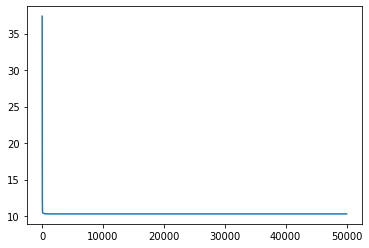

In [133]:
a = regression.errors
plt.plot(a)
plt.show

In [224]:
#ConcreteData
# Gradient Descent with regularization
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.0005, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = True, sgd = False)
regression.fit()

data is full rank
solving using gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[35.33747015  7.69629314  4.22516551  1.11132739 -5.88937521  2.59979581
 -1.52087258 -2.47233749  6.81474937]
The SSE on training data is 67475.97538283015 and RMSE is 10.457599454841894
The SSE on testing data is 46089.71789193762 and RMSE is 10.576778683064527


<function matplotlib.pyplot.show(*args, **kw)>

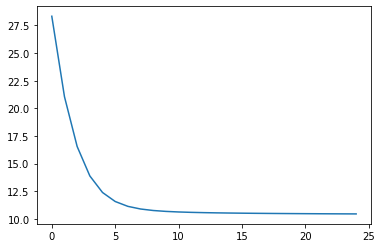

In [225]:
a = regression.errors
plt.plot(a)
plt.show

In [232]:
#ConcreteData
# Stochastic Gradient Descent 
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.0005, tolerance = 0.005, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[35.69842836  6.79854662  4.38105296  2.43767681 -5.35926917  2.68245423
 -2.48409855 -3.86903406  5.32256569]
The SSE on training data is 72768.25547272779 and RMSE is 10.859964351951291
The SSE on testing data is 48362.042519635885 and RMSE is 10.834371156123035


<function matplotlib.pyplot.show(*args, **kw)>

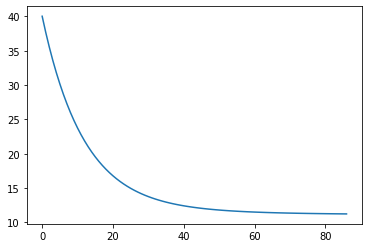

In [233]:
a = regression.errors
plt.plot(a)
plt.show

In [234]:
#ConcreteData
# Stochastic Gradient Descent with regularization
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.0005, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[31.75149923  6.87972555  3.49612694 -0.36760242 -4.24791961  2.31810369
 -2.16722255 -2.97992231  4.67566072]
The SSE on training data is 84947.92196607124 and RMSE is 11.733668050075122
The SSE on testing data is 53635.99513233801 and RMSE is 11.409840235722143


<function matplotlib.pyplot.show(*args, **kw)>

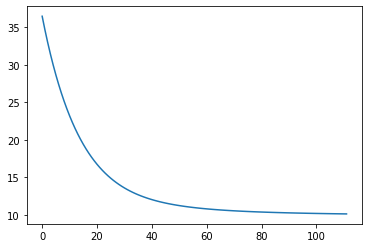

In [235]:
a = regression.errors
plt.plot(a)
plt.show

In [236]:
#yachtData
# Closed Form Solution
regression = LinearRegression(df2.values[:, 0:-1], df2.values[:, -1], learningRate = 0.005, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = False)
regression.fit()

data is full rank
[35.34038278 10.11270375  6.66226242  3.41342443 -4.69021939  2.00114988
 -0.04020913 -0.44929383  7.00945922]
The SSE on training data is 66005.91805396418 and RMSE is 10.343055520215936
The SSE on testing data is 44733.685916722236 and RMSE is 10.420024355291105


In [239]:
#yachtData
# Closed Form Solution
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.005, tolerance = 0.005, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = False)
regression.fit()


data is full rank
[10.38581522  0.85359091  0.53091261  3.14435008 -2.77791418 -3.07815146
 12.69097692]
The SSE on training data is 15199.535454333862 and RMSE is 9.08879370144722
The SSE on testing data is 9088.93266222409 and RMSE is 8.59614806070118


In [142]:
#yachtData
# Closed Form Solution with regularization
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.0003, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = False)
regression.fit()


data is full rank
[ 9.85046392  0.74776646 -0.15166479  0.37196966 -0.38672134 -0.35516822
 12.00477918]

 The SSE on training data is 15363.633492396026 and RMSE is 15363.633492396026


In [240]:
#YatchData
# Gradient Descent
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.0003, tolerance = 0.005, maxIteration = 50000, lamda = 0, sample_size = 100, gd = True, sgd = False)
regression.fit()

data is full rank
solving using gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[ 9.87359764e+00  6.50413568e-01 -2.24078833e-01  2.92283258e-02
 -1.29262051e-01  7.00709328e-04  1.20081233e+01]
The SSE on training data is 15369.24873212367 and RMSE is 9.13939416581118
The SSE on testing data is 8836.224201954063 and RMSE is 8.475802095029005


<function matplotlib.pyplot.show(*args, **kw)>

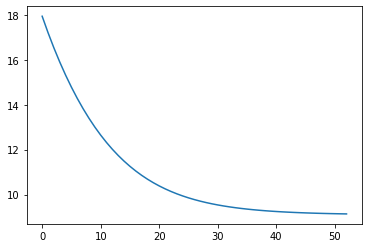

In [241]:
a = regression.errors
plt.plot(a)
plt.show

In [242]:
#YatchData
# Gradient Descent with regularization
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.0003, tolerance = 0.005, maxIteration = 50000, lamda = 10, sample_size = 100, gd = True, sgd = False)
regression.fit()

data is full rank
solving using gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[ 9.52753883e+00  6.24574043e-01 -2.18240564e-01  2.91004187e-02
 -1.30138237e-01  7.46209100e-04  1.15882411e+01]
The SSE on training data is 15588.593509616236 and RMSE is 9.204380310487405
The SSE on testing data is 8841.329058234413 and RMSE is 8.478250058277727


<function matplotlib.pyplot.show(*args, **kw)>

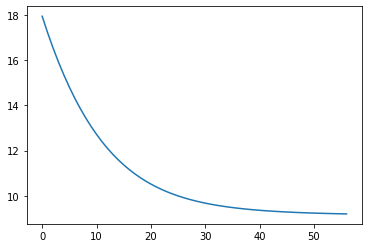

In [243]:
a = regression.errors
plt.plot(a)
plt.show

In [244]:
#YatchData
# Stochastic Gradient Descent 
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.0004, tolerance = 0.004, maxIteration = 50000, lamda = 0, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[10.0308748   0.65026038 -0.50760845  1.09019933  0.03249949  0.19871878
 12.62283882]
The SSE on training data is 15556.334949704782 and RMSE is 9.194851746477477
The SSE on testing data is 9114.057133024246 and RMSE is 8.608020996241926


<function matplotlib.pyplot.show(*args, **kw)>

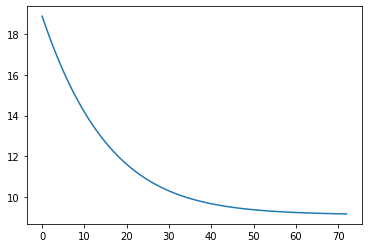

In [245]:
a = regression.errors
plt.plot(a)
plt.show

In [246]:
#YatchData
# Stochastic Gradient Descent with regularization
regression = LinearRegression(df3.values[:, 0:-1], df3.values[:, -1], learningRate = 0.0004, tolerance = 0.004, maxIteration = 50000, lamda = 10, sample_size = 100, gd = False, sgd = True)
regression.fit()

data is full rank
Solving using self gradient descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped - no further improvement


[ 9.56985225  0.85734996 -1.1207237   0.20808186 -0.51593561  0.08453287
 11.52596456]
The SSE on training data is 15826.15011566571 and RMSE is 9.274248509244654
The SSE on testing data is 8998.949154795184 and RMSE is 8.55348982874051


<function matplotlib.pyplot.show(*args, **kw)>

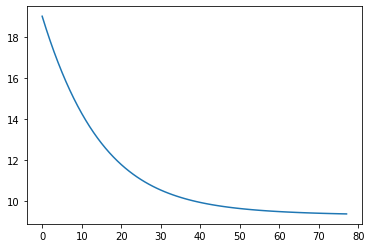

In [247]:
a = regression.errors
plt.plot(a)
plt.show